<a href="https://colab.research.google.com/github/muskanchojer/MLtries/blob/notebooks/notebooks/train-yolov8-instance-segmentation-on-custom-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Train YOLOv8 Instance Segmentation on a Custom Dataset

---

Tweaked the original roboflow notebook for my own understanding and usage afterwards.

The notebook is useful for training YOLOv8 instance segmentation model using custom dataset created on roboflow. Nowadays YOLOv11 is also present for better handling of predictions.

Ultralytics YOLOv8 is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics.

## Steps to train model using roboflow dataset:

- Pre-requisite checks
- Installing YOLO
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Deploy the Trained Model to Roboflow

##Useful Links for better understanding
1. Read this [blog post](https://blog.roboflow.com/how-to-train-yolov8-instance-segmentation/).
2. Find more [Roboflow Notebooks](https://github.com/roboflow/notebooks) here.

## Pre-requisite checks
Make sure to have access to GPU. Use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

This will ensure your notebook uses a GPU, which will significantly speed up model training times.

In [2]:
!nvidia-smi

Fri Aug 22 04:26:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
!rm -rf /contents/*             #delete exisitng directories, if present

In [3]:
import os
HOME = os.getcwd()            #gets current working directory to HOME variable
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q          #use this version to avoid dependency issues
from IPython import display
display.clear_output()
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.4/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

## Basics to use with CLI or python

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 1. CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 97.3MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,810,560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [00:00<00:00, 64.1MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 83.6ms
Speed: 12.7ms preprocess, 83.6ms inference, 1527.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


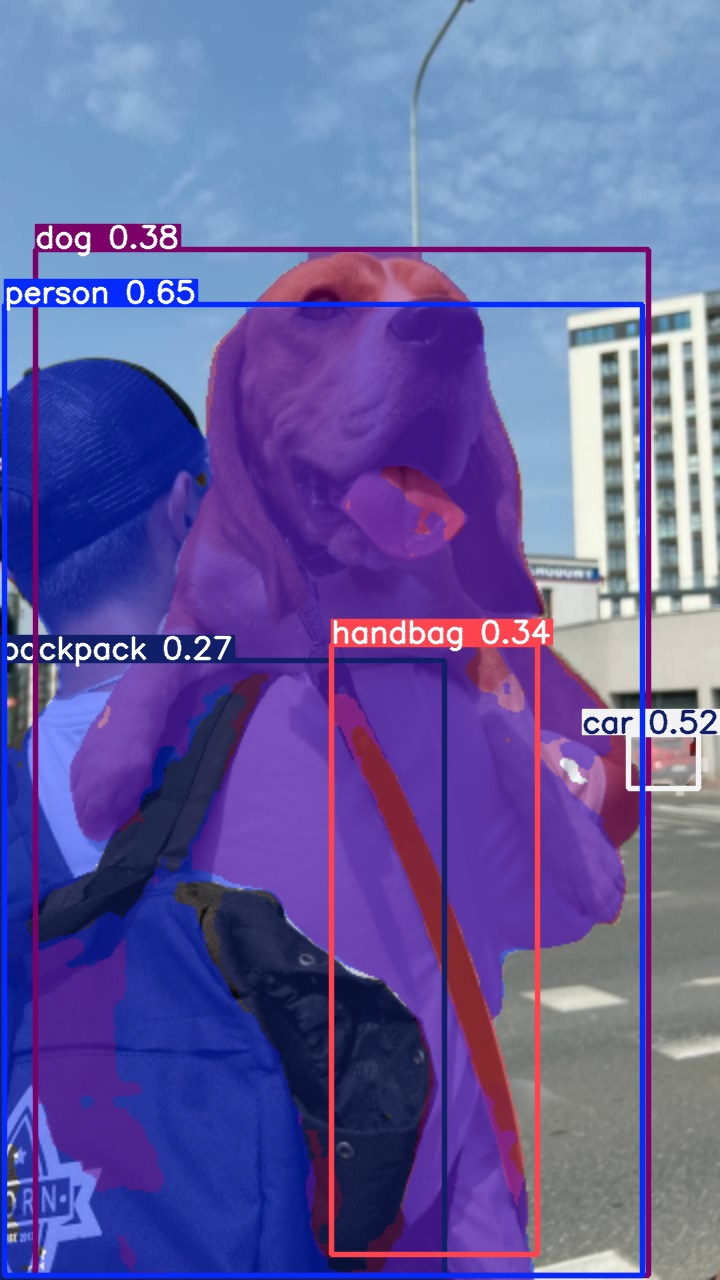

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)             #use any test image

### 2. Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
WARNING ⚠️ NMS time limit 2.050s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 116.7ms
Speed: 2.3ms preprocess, 116.7ms inference, 2392.8ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy             #gives bounding box coordinates, where (x1, y1) are the coordinates of top-left corner
                                  #and (x2, y2) are the coordinates of the bottom-right corner of the bounding box.

tensor([[4.4446e+00, 3.0434e+02, 6.4261e+02, 1.2755e+03],
        [6.2834e+02, 7.3451e+02, 6.9819e+02, 7.8832e+02],
        [3.5369e+01, 2.4992e+02, 6.4884e+02, 1.2759e+03],
        [3.3150e+02, 6.4431e+02, 5.3794e+02, 1.2545e+03],
        [8.8925e-01, 6.6045e+02, 4.4417e+02, 1.2785e+03]], device='cuda:0')

In [ ]:
results[0].boxes.conf               #gives confidence threshold of the detections

tensor([0.6489, 0.5239, 0.3784, 0.3442, 0.2668], device='cuda:0')

In [ ]:
results[0].boxes.cls                #gives class ids of the detections (labels)

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [1]:
results[0].masks.data               #gives segmentation mask data of the detections

NameError: name 'results' is not defined

## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src=""
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a [supported format](https://roboflow.com/formats), the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 4: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLOv8` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




🟢 Tip: The examples below work even if you use our non-custom model. However, you won't be able to deploy it to Roboflow. To do that, create a custom dataset as described below or fork (copy) one into your workspace from Universe.

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

# !pip install roboflow==1.1.48 --quiet

# import roboflow

# roboflow.login()

# rf = roboflow.Roboflow()

# project = rf.workspace("model-examples").project("car-parts-instance-segmentation")
# dataset = project.version(3).download("yolov8")
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="___________")
project = rf.workspace("firepark").project("slot1-edqkt")
version = project.version(4)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to slot1-4 in yolov8:: 100%|██████████| 162/162 [00:00<00:00, 9897.99it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/content
100% 22.8M/22.8M [00:00<00:00, 38.0MB/s]
New https://pypi.org/project/ultralytics/8.3.182 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/slot1-4/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False,

/content


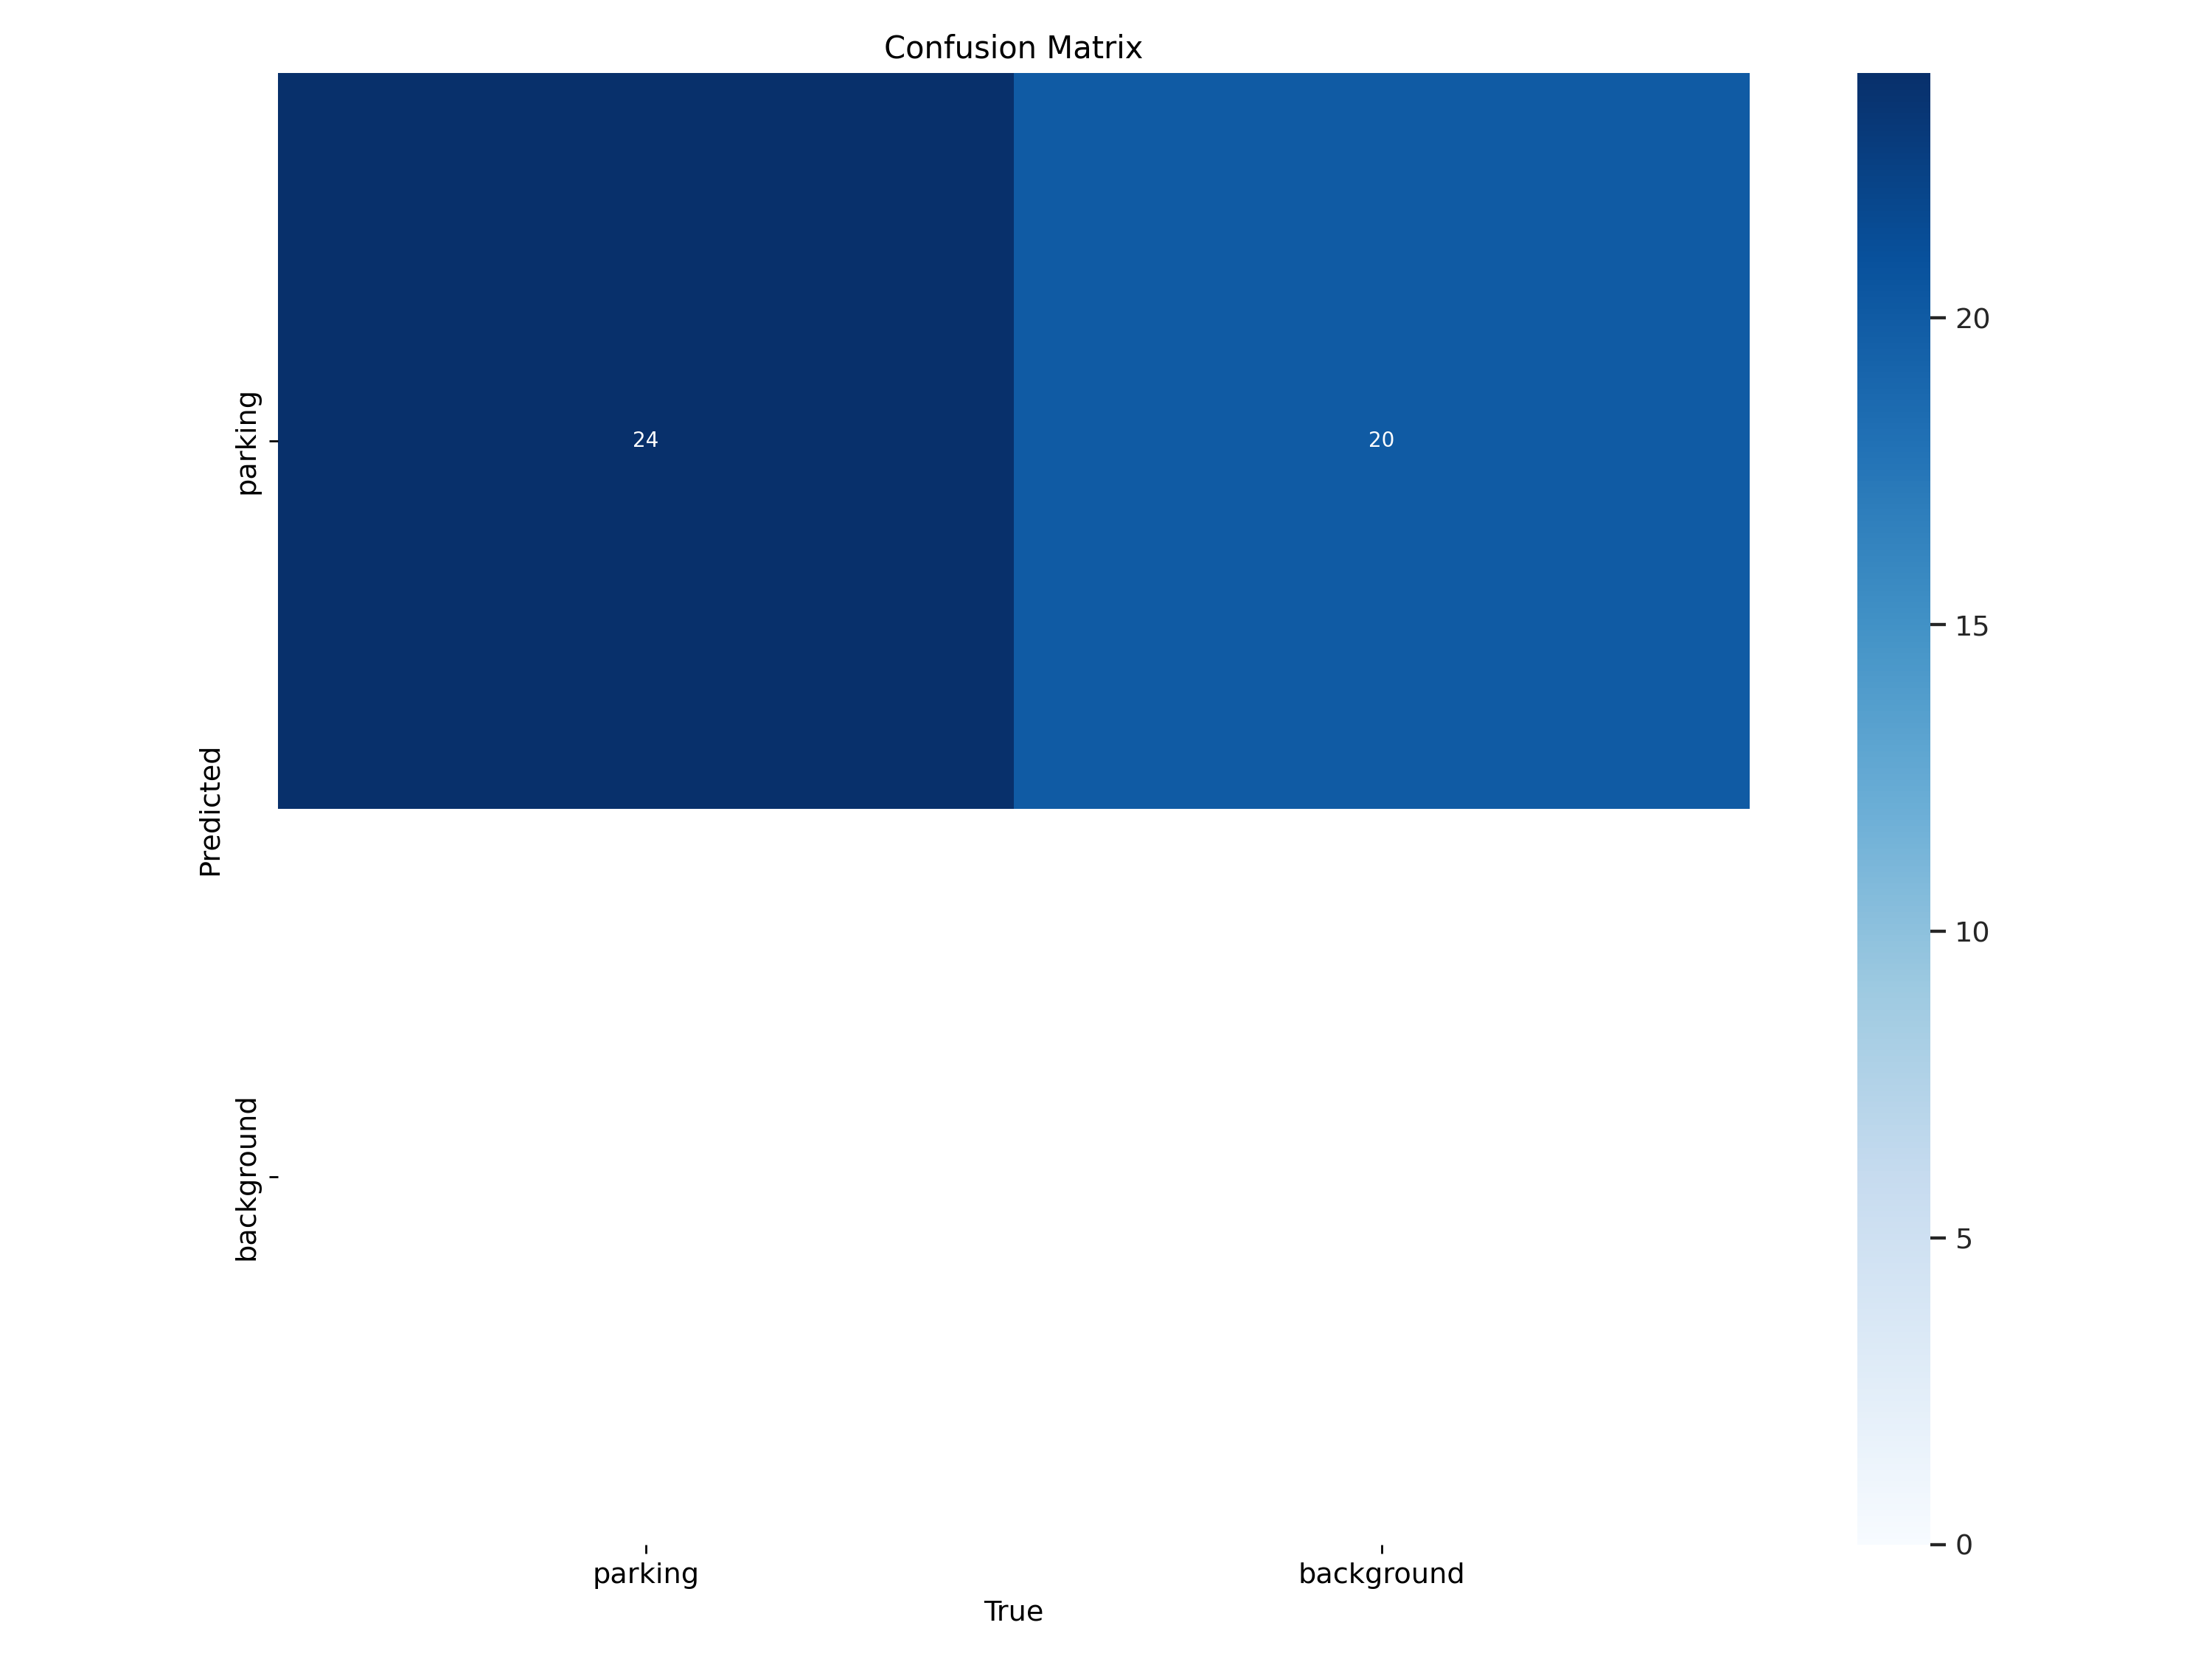

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


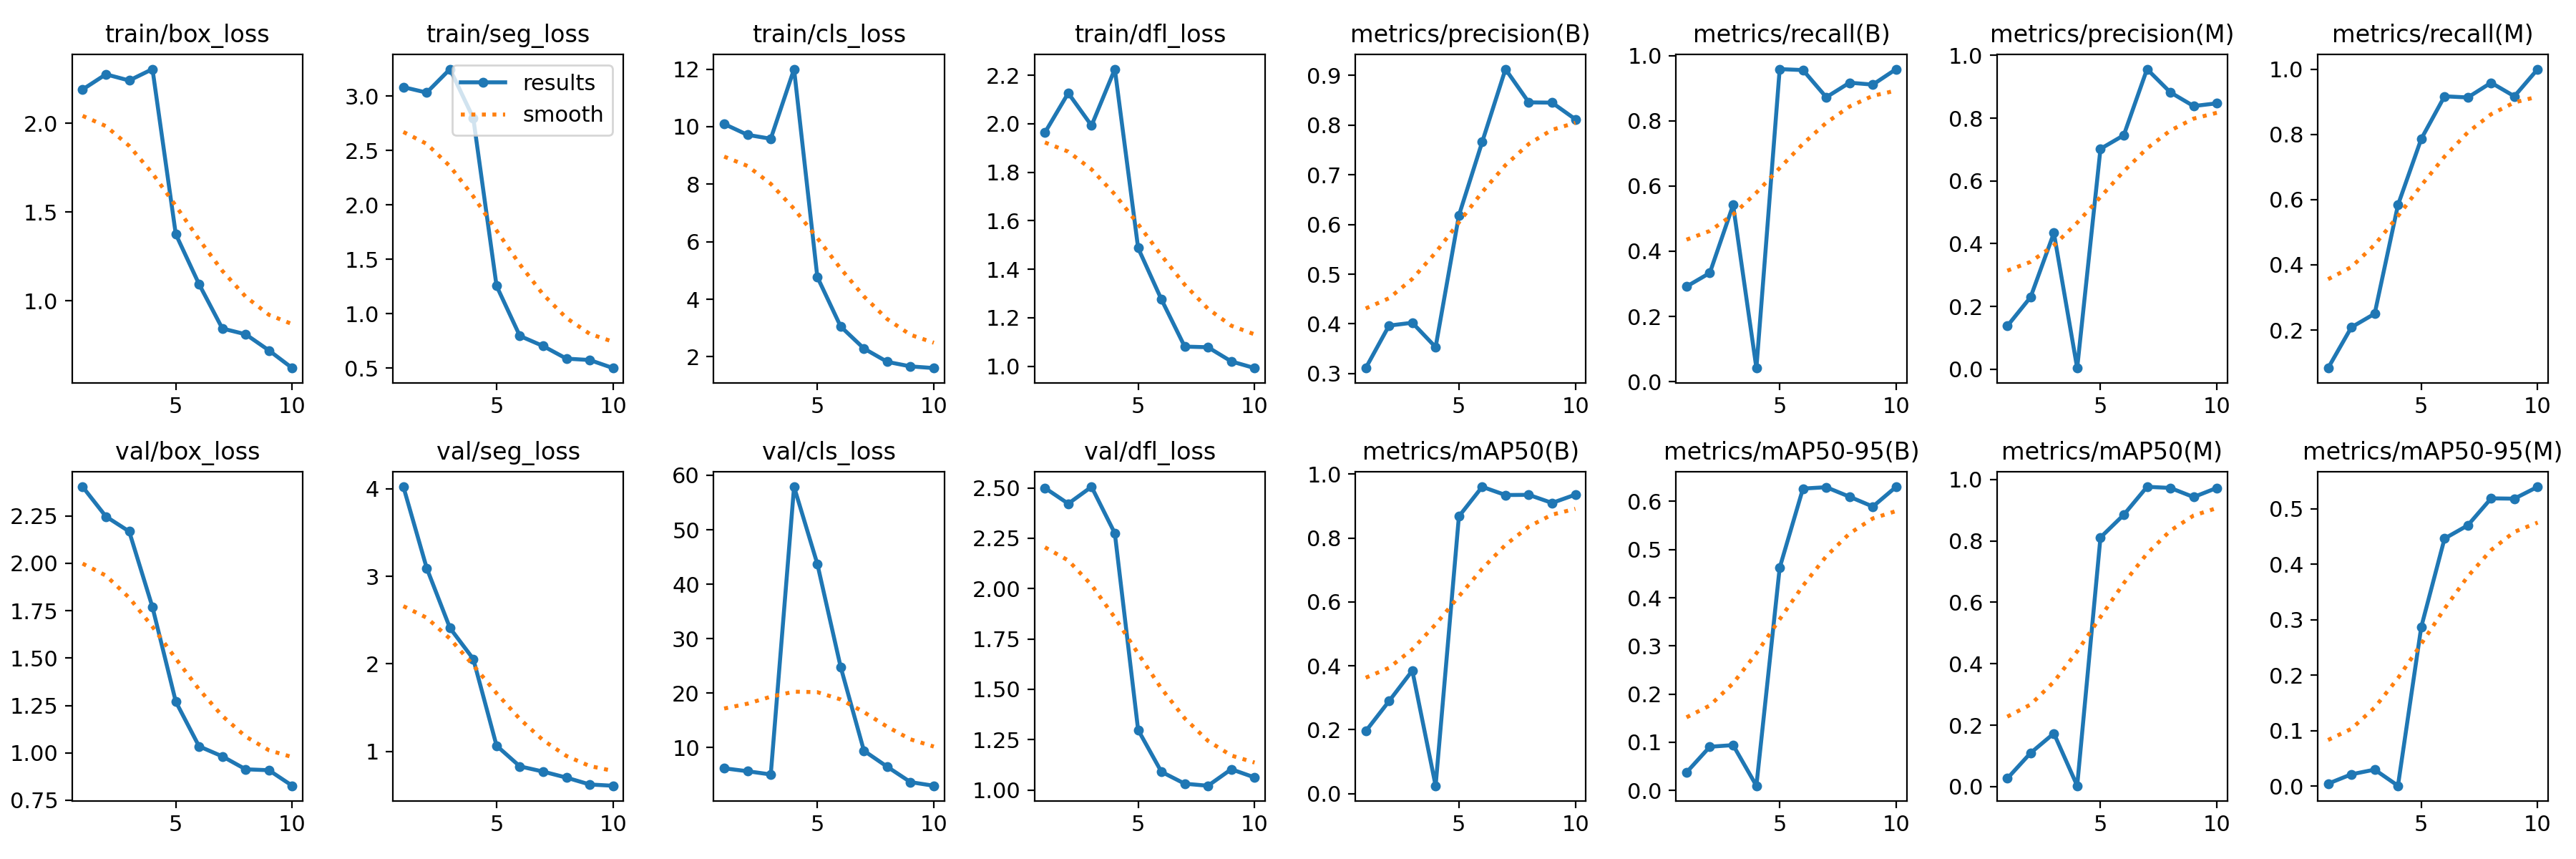

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1500)

/content


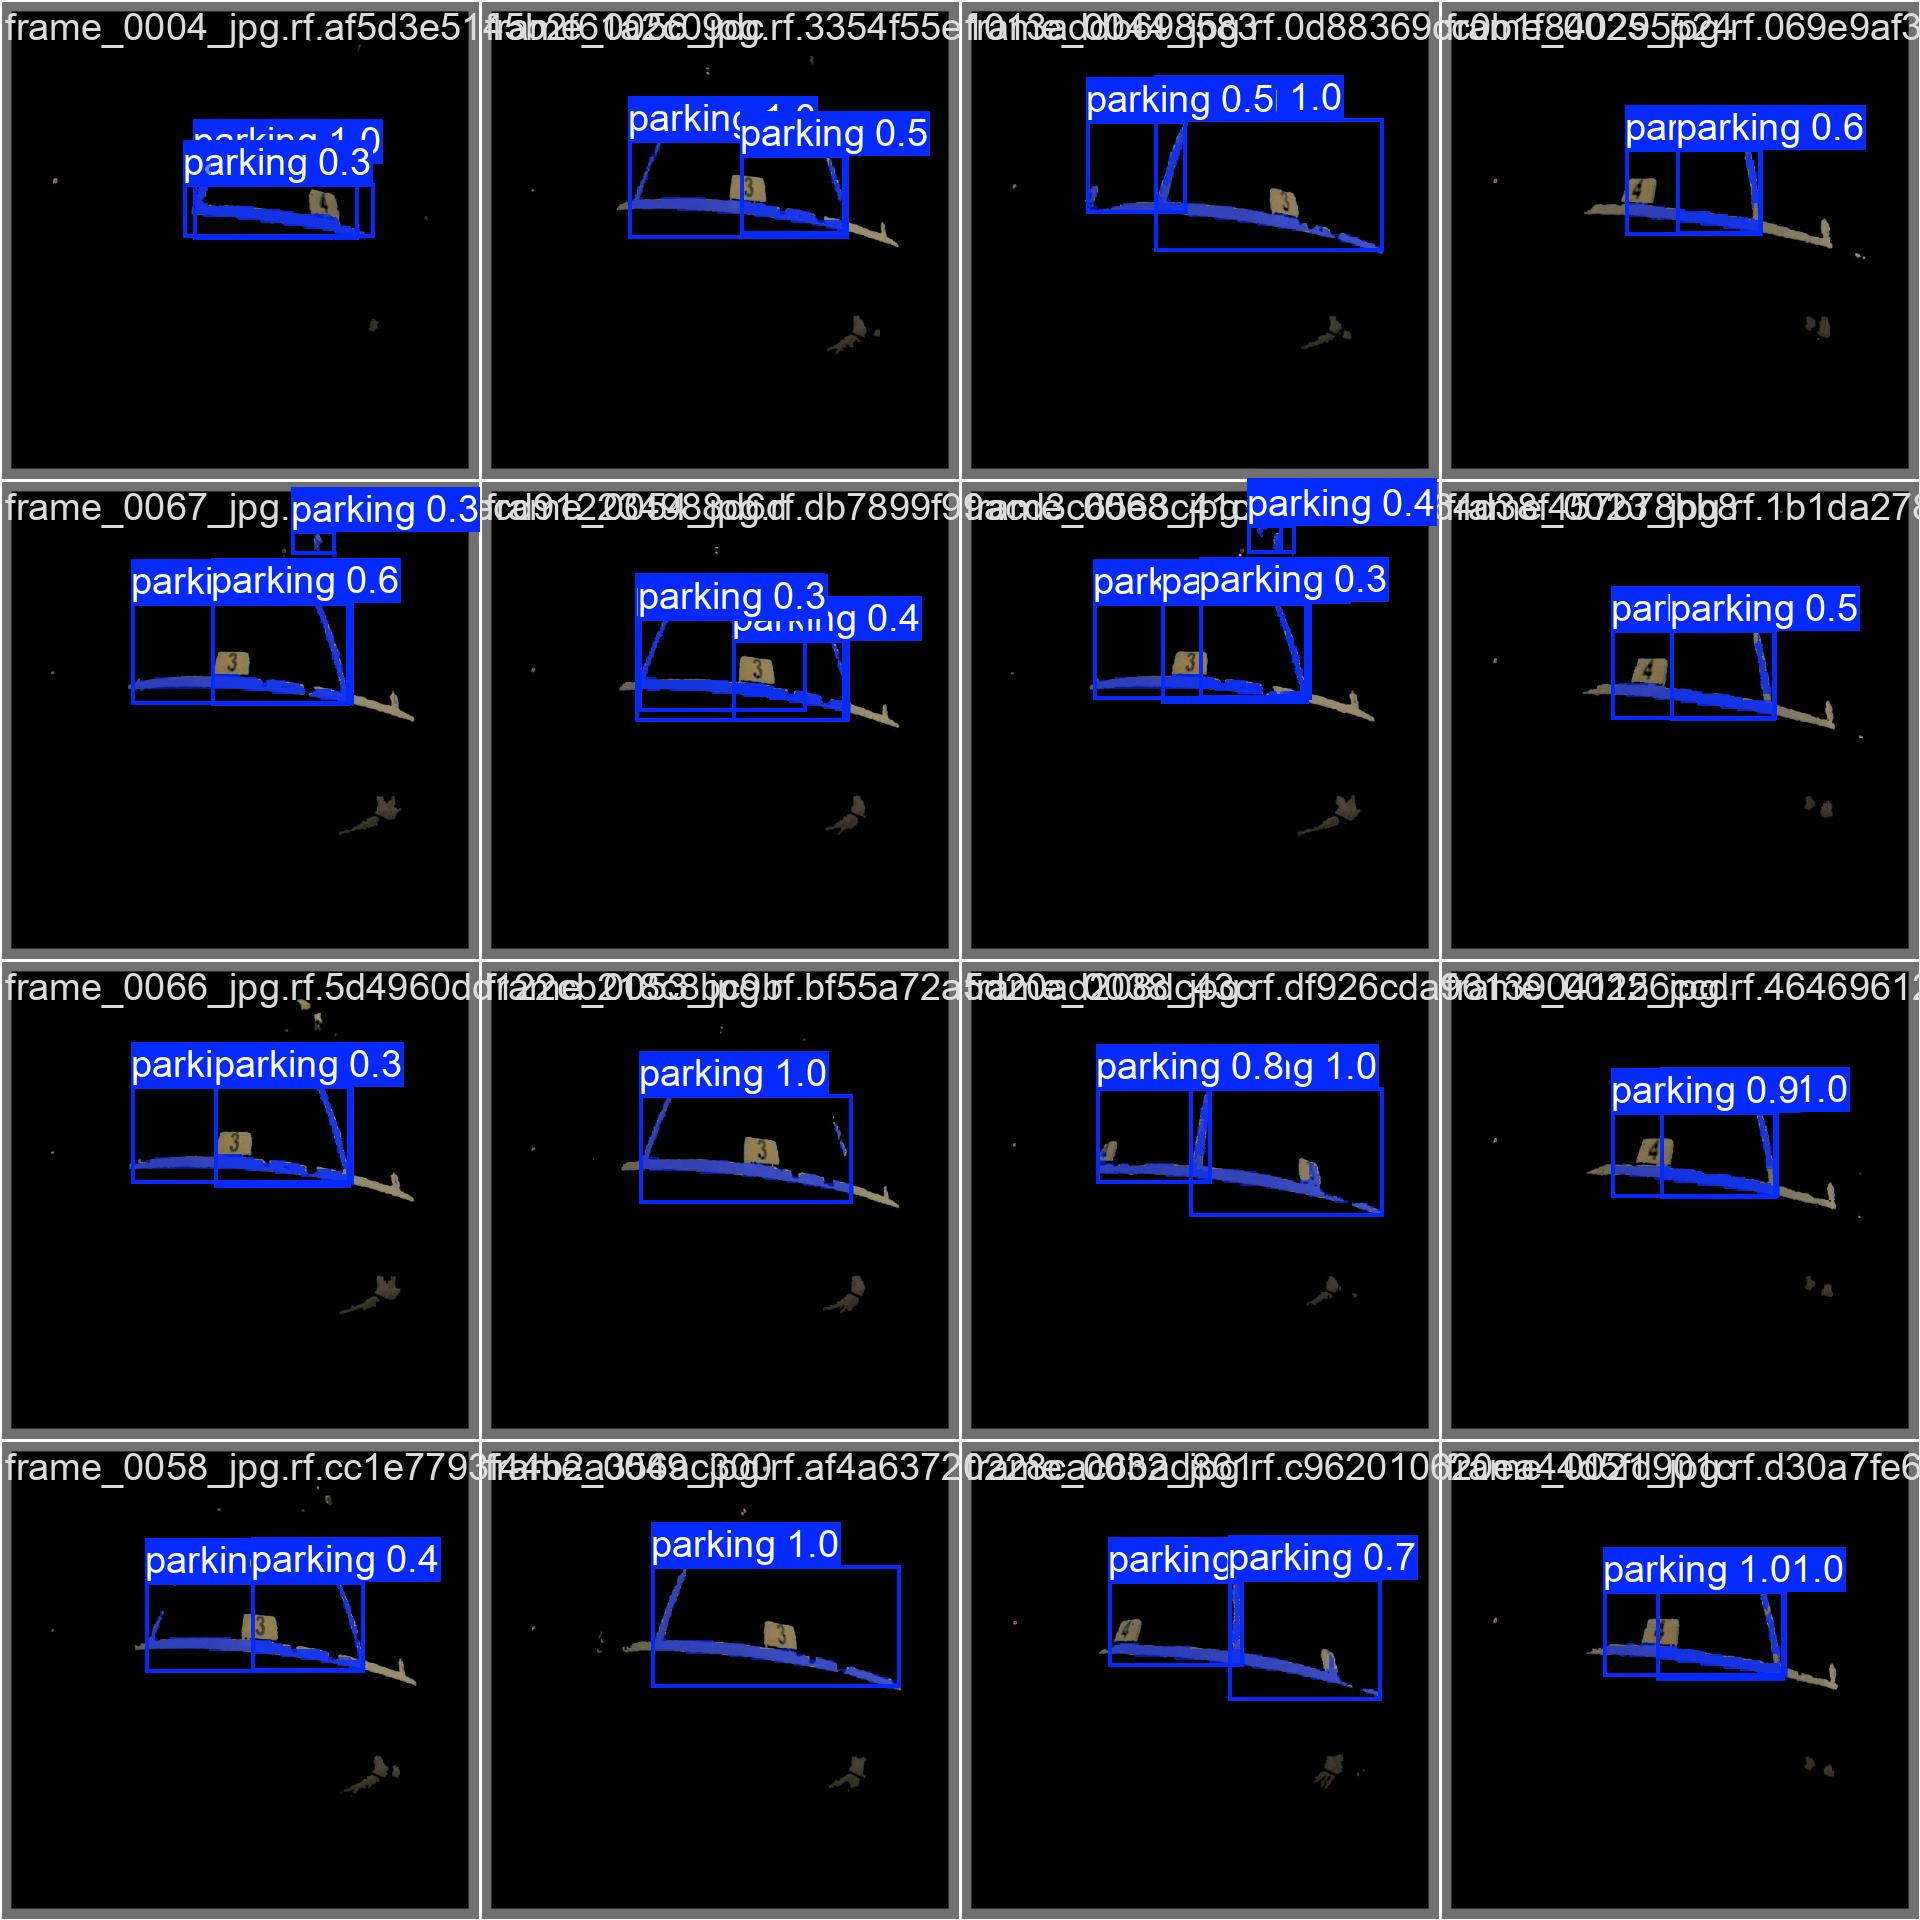

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/slot1-4/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.98it/s]
                   all         21         24      0.812      0.958      0.936      0.647      0.848          1      0.972       0.54
Speed: 0.2ms preprocess, 24.3ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs

image 1/18 /content/datasets/slot1-4/test/images/frame_0011_jpg.rf.e5fcbd26fc0559c3f34be62540aabb3e.jpg: 640x640 1 parking, 20.8ms
image 2/18 /content/datasets/slot1-4/test/images/frame_0013_jpg.rf.29300402ec6dcdcf3f77f909331197e5.jpg: 640x640 1 parking, 20.8ms
image 3/18 /content/datasets/slot1-4/test/images/frame_0014_jpg.rf.916c4f6d74c11d0c5972028df8d7eb26.jpg: 640x640 1 parking, 20.8ms
image 4/18 /content/datasets/slot1-4/test/images/frame_0019_jpg.rf.0ed6c1ab3460fd8e8818066c667c5294.jpg: 640x640 2 parkings, 20.8ms
image 5/18 /content/datasets/slot1-4/test/images/frame_0020_jpg.rf.3fc105fe55aaa05f1dc3d6642d08fc37.jpg: 640x640 3 parkings, 20.8ms
image 6/18 /content/datasets/slot1-4/test/images/frame_0030_jpg.rf.f7048a8cb2b4041bc267cca5b86de1db.jpg: 640x640 3 parkings, 20.8ms
image 7/18 /content/data

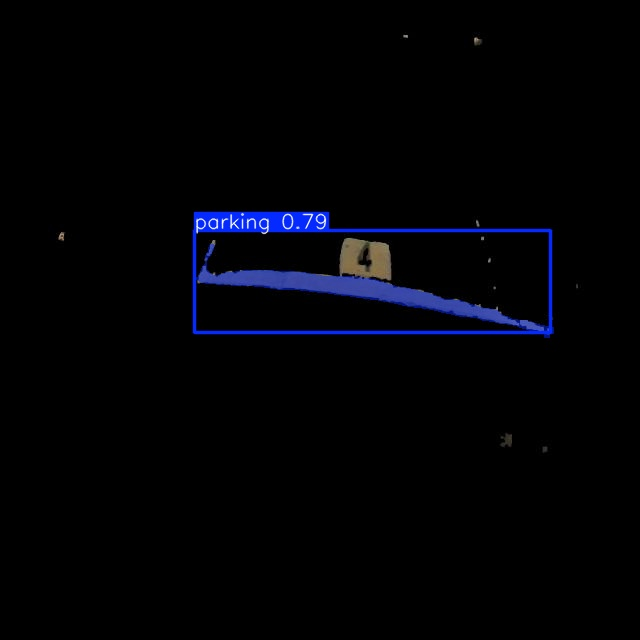

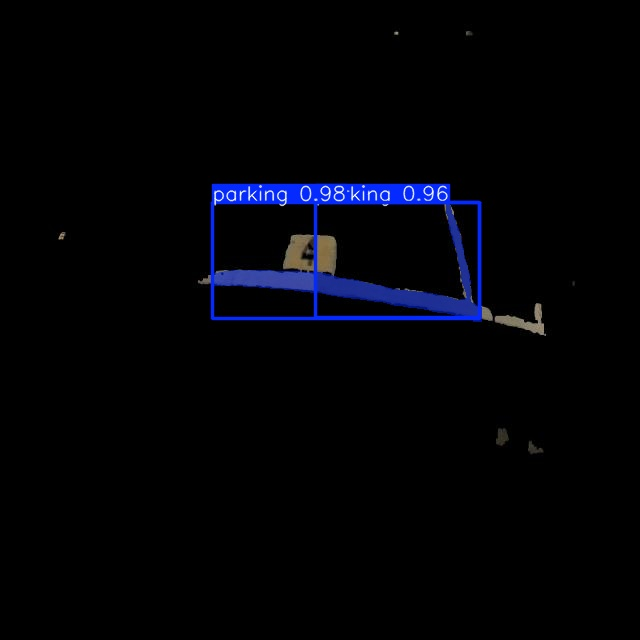

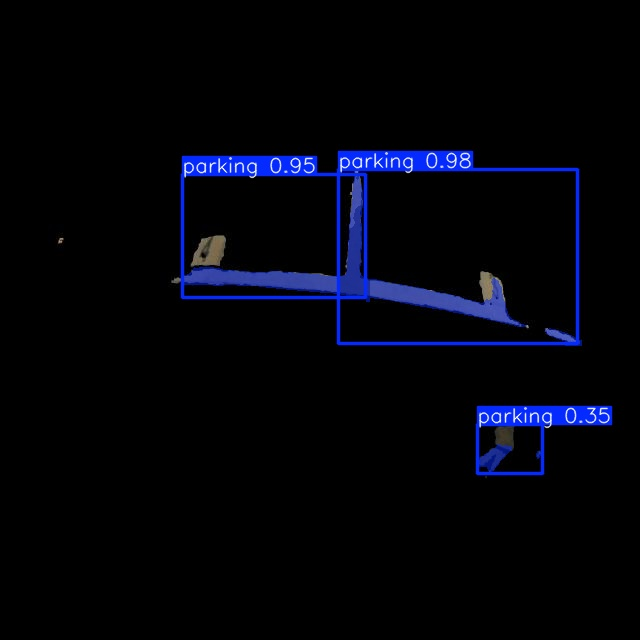

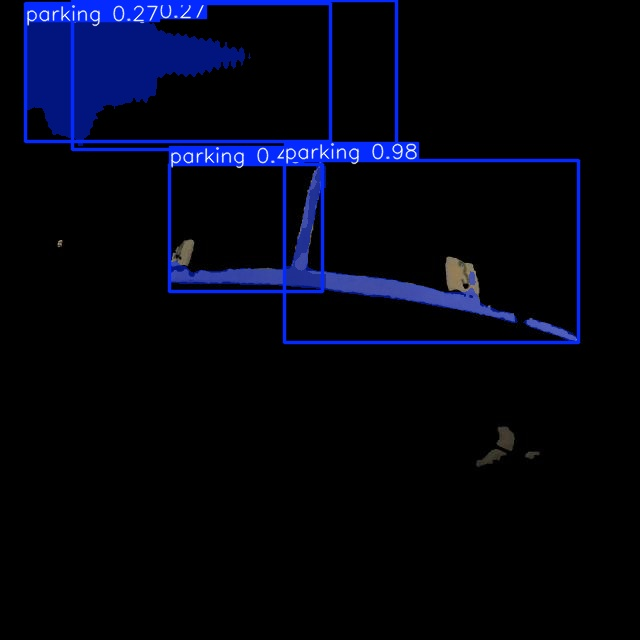

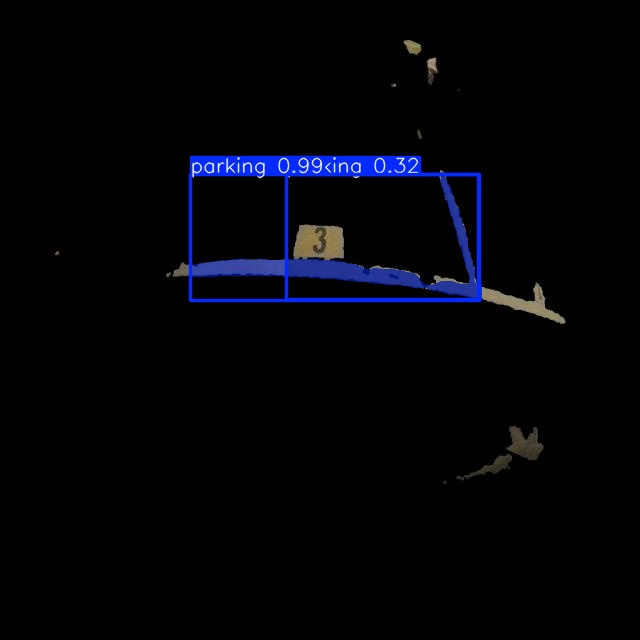

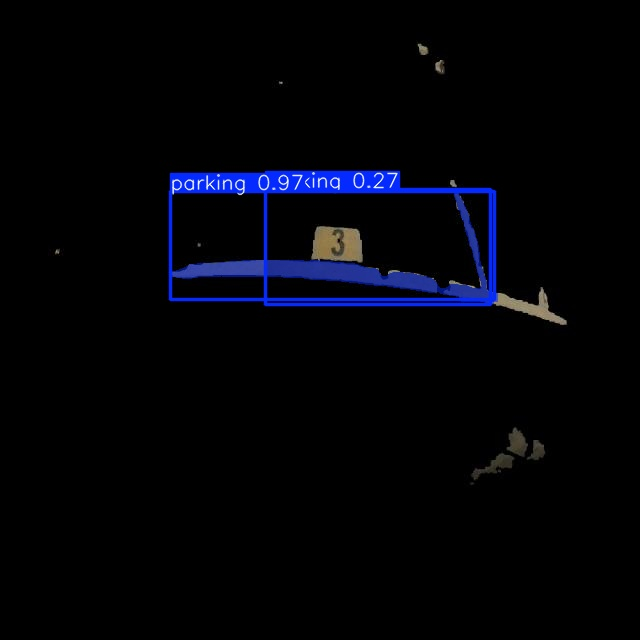

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[12:23]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Save & Deploy model

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload and your model weights to Roboflow Deploy for autolabeling, autoscaling inference, and storage for later use.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) supports uploading YOLOv8 weights.

Run this cell to save your model weights:

In [ ]:
from google.colab import files
import os

folder_to_download = "/content/runs/segment/" # Replace with the path to the folder you want to download

# Compress the folder before downloading (optional but recommended for folders)
!zip -r /tmp/folder_to_download.zip {folder_to_download}

# Download the compressed folder
files.download('/tmp/folder_to_download.zip')

# Clean up the compressed file (optional)
!rm /tmp/folder_to_download.zip

  adding: content/runs/segment/ (stored 0%)
  adding: content/runs/segment/val/ (stored 0%)
  adding: content/runs/segment/val/MaskP_curve.png (deflated 16%)
  adding: content/runs/segment/val/confusion_matrix.png (deflated 42%)
  adding: content/runs/segment/val/confusion_matrix_normalized.png (deflated 40%)
  adding: content/runs/segment/val/BoxR_curve.png (deflated 20%)
  adding: content/runs/segment/val/val_batch0_pred.jpg (deflated 36%)
  adding: content/runs/segment/val/val_batch0_labels.jpg (deflated 40%)
  adding: content/runs/segment/val/MaskR_curve.png (deflated 20%)
  adding: content/runs/segment/val/BoxF1_curve.png (deflated 16%)
  adding: content/runs/segment/val/BoxPR_curve.png (deflated 28%)
  adding: content/runs/segment/val/BoxP_curve.png (deflated 16%)
  adding: content/runs/segment/val/MaskPR_curve.png (deflated 28%)
  adding: content/runs/segment/val/val_batch1_labels.jpg (deflated 52%)
  adding: content/runs/segment/val/val_batch1_pred.jpg (deflated 49%)
  adding: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"/content/runs/segment/train/")

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL ultralytics.nn.tasks.SegmentationModel was not an allowed global by default. Please use `torch.serialization.add_safe_globals([ultralytics.nn.tasks.SegmentationModel])` or the `torch.serialization.safe_globals([ultralytics.nn.tasks.SegmentationModel])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [ ]:
# Run inference on your model on a persistant, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image).json()
pred

running inference on 0374638_as-2885603_jpg.rf.6c1803fe031371708c4c54ef436e6dc2.jpg


{'predictions': [{'x': 527.5,
   'y': 404.0,
   'width': 521.0,
   'height': 338.0,
   'confidence': 0.9511378407478333,
   'class': 'Rearbumper',
   'points': [{'x': 346.25, 'y': 236.25},
    {'x': 343.75, 'y': 238.125},
    {'x': 343.75, 'y': 239.0625},
    {'x': 341.25, 'y': 240.9375},
    {'x': 341.25, 'y': 241.875},
    {'x': 340.0, 'y': 242.8125},
    {'x': 340.0, 'y': 244.6875},
    {'x': 338.75, 'y': 245.625},
    {'x': 338.75, 'y': 246.5625},
    {'x': 336.25, 'y': 248.4375},
    {'x': 336.25, 'y': 249.375},
    {'x': 335.0, 'y': 250.3125},
    {'x': 335.0, 'y': 253.125},
    {'x': 333.75, 'y': 254.0625},
    {'x': 333.75, 'y': 255.0},
    {'x': 331.25, 'y': 256.875},
    {'x': 331.25, 'y': 257.8125},
    {'x': 330.0, 'y': 258.75},
    {'x': 330.0, 'y': 262.5},
    {'x': 328.75, 'y': 263.4375},
    {'x': 328.75, 'y': 264.375},
    {'x': 326.25, 'y': 266.25},
    {'x': 326.25, 'y': 267.1875},
    {'x': 325.0, 'y': 268.125},
    {'x': 325.0, 'y': 271.875},
    {'x': 321.25, 'y':

# Deploy Your Model to the Edge

![Roboflow Inference banner](https://blog.roboflow.com/content/images/2023/08/banner.png)

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv8 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv8. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

*All rights and licenses belong to roboflow and ultralytics who are the original writers of this notebook.*